In [9]:
import numpy as np # linear algebra
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import dabl
import missingno as msno

In [2]:
titanic_df = pd.read_csv("train.csv" )

In [3]:
titanic_df.shape
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic_df_clean = dabl.clean(titanic_df, verbose= 1)

Detected feature types:
2 float, 5 int, 5 object, 0 date, 0 other
Interpreted as:
continuous      2
dirty_float     0
low_card_int    2
categorical     4
date            0
free_string     3
useless         1
dtype: int64


In [5]:
types= dabl.detect_types(titanic_df_clean)
print(types)

          continuous  dirty_float  low_card_int  categorical   date  \
Survived       False        False         False         True  False   
Pclass         False        False         False         True  False   
Name           False        False         False        False  False   
Sex            False        False         False         True  False   
Age             True        False         False        False  False   
SibSp          False        False          True        False  False   
Parch          False        False          True        False  False   
Ticket         False        False         False        False  False   
Fare            True        False         False        False  False   
Cabin          False        False         False        False  False   
Embarked       False        False         False         True  False   

          free_string  useless  
Survived        False    False  
Pclass          False    False  
Name             True    False  
Sex            

Target looks like classification
Linear Discriminant Analysis training set score: 0.579


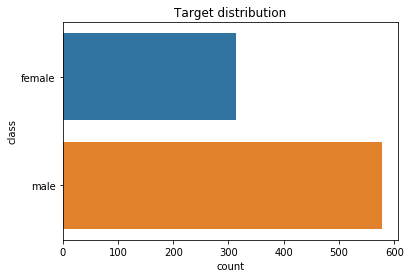

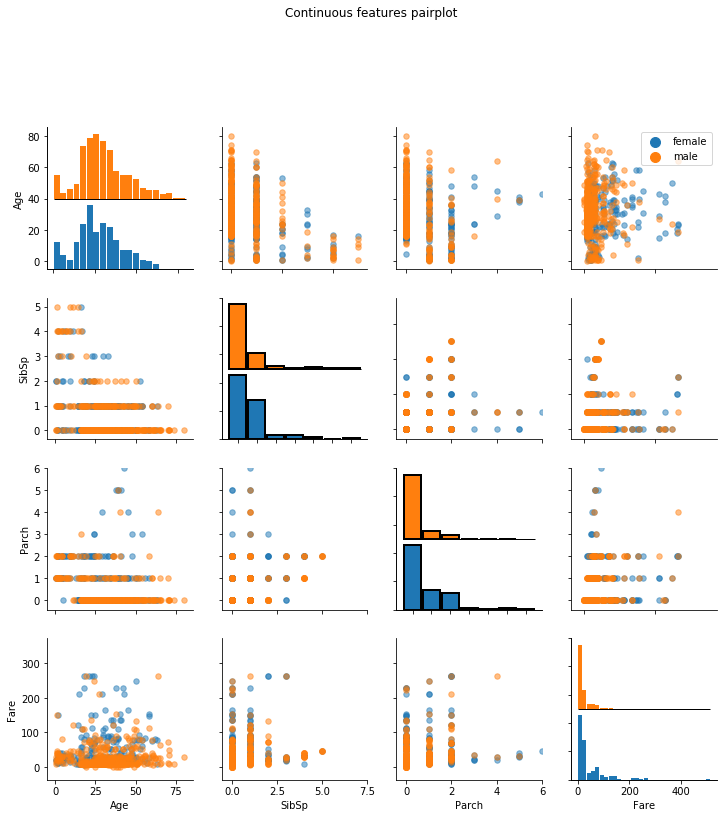

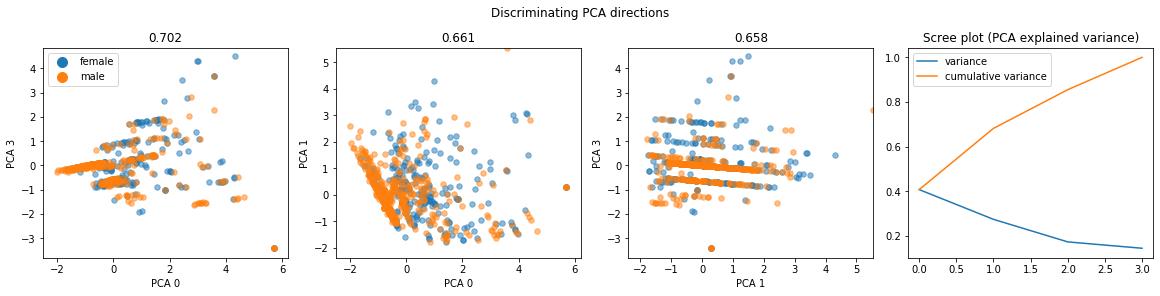

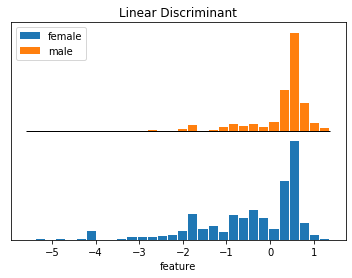

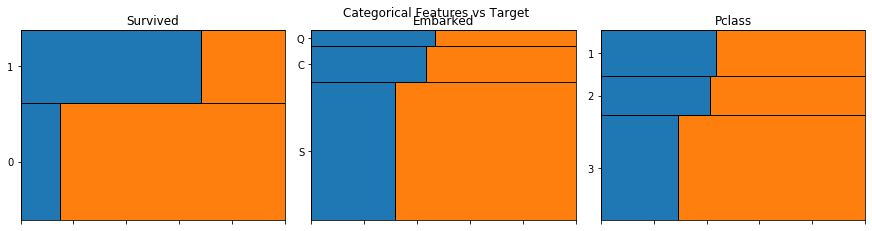

In [6]:
dabl.plot(titanic_df, target_col="Sex")


Target looks like classification
Linear Discriminant Analysis training set score: 0.589


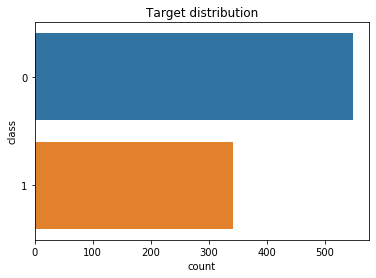

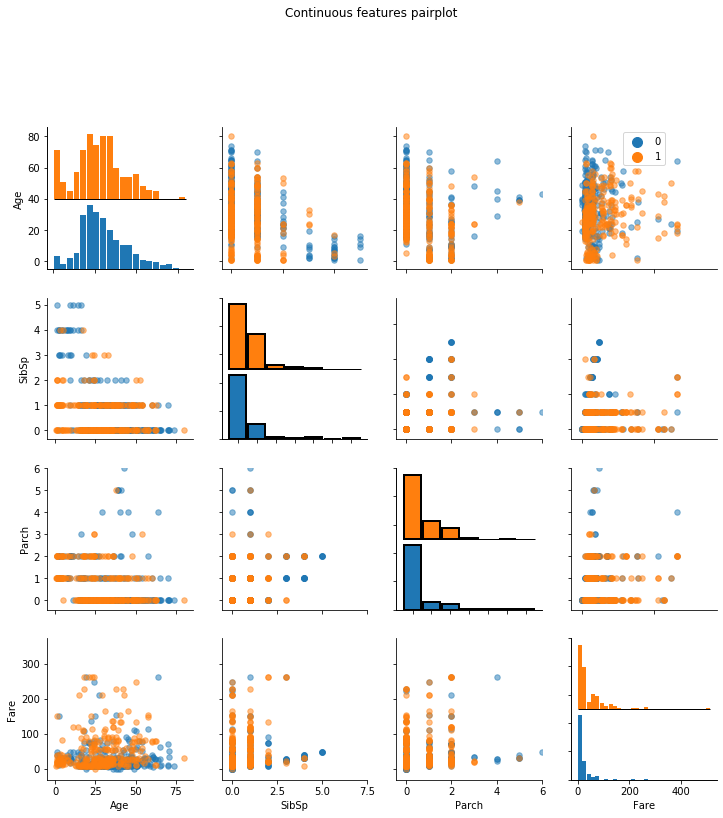

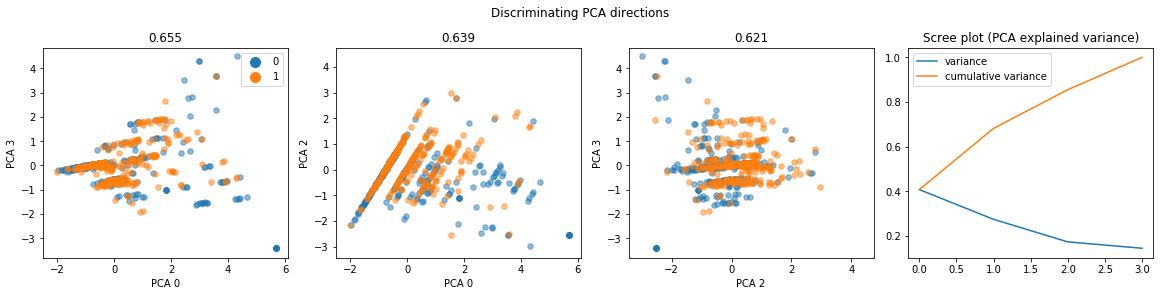

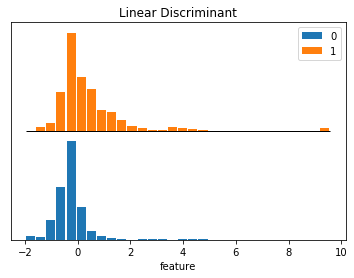

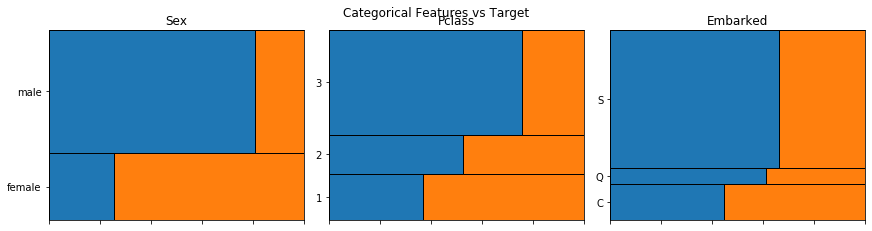

In [7]:
dabl.plot(titanic_df, target_col="Survived")

In [8]:
ec1 = dabl.SimpleClassifier(random_state=0).fit(titanic_df, target_col="Survived") 

Running DummyClassifier(strategy='prior')
accuracy: 0.616 average_precision: 0.384 roc_auc: 0.500 recall_macro: 0.500 f1_macro: 0.381
=== new best DummyClassifier(strategy='prior') (using recall_macro):
accuracy: 0.616 average_precision: 0.384 roc_auc: 0.500 recall_macro: 0.500 f1_macro: 0.381

Running GaussianNB()
accuracy: 0.424 average_precision: 0.737 roc_auc: 0.827 recall_macro: 0.529 f1_macro: 0.354
=== new best GaussianNB() (using recall_macro):
accuracy: 0.424 average_precision: 0.737 roc_auc: 0.827 recall_macro: 0.529 f1_macro: 0.354

Running MultinomialNB()
accuracy: 0.763 average_precision: 0.783 roc_auc: 0.831 recall_macro: 0.742 f1_macro: 0.746
=== new best MultinomialNB() (using recall_macro):
accuracy: 0.763 average_precision: 0.783 roc_auc: 0.831 recall_macro: 0.742 f1_macro: 0.746

Running DecisionTreeClassifier(class_weight='balanced', max_depth=1)
accuracy: 0.787 average_precision: 0.632 roc_auc: 0.767 recall_macro: 0.767 f1_macro: 0.771
=== new best DecisionTreeClas

In [21]:
ec2 = dabl.SimpleClassifier(random_state=0).fit(titanic_df, target_col="Sex") 

Running DummyClassifier(strategy='prior')
accuracy: 0.648 average_precision: 0.352 roc_auc: 0.500 recall_macro: 0.500 f1_macro: 0.393
=== new best DummyClassifier(strategy='prior') (using recall_macro):
accuracy: 0.648 average_precision: 0.352 roc_auc: 0.500 recall_macro: 0.500 f1_macro: 0.393

Running GaussianNB()
accuracy: 0.655 average_precision: 0.238 roc_auc: 0.781 recall_macro: 0.524 f1_macro: 0.459
=== new best GaussianNB() (using recall_macro):
accuracy: 0.655 average_precision: 0.238 roc_auc: 0.781 recall_macro: 0.524 f1_macro: 0.459

Running MultinomialNB()
accuracy: 0.781 average_precision: 0.230 roc_auc: 0.825 recall_macro: 0.763 f1_macro: 0.761
=== new best MultinomialNB() (using recall_macro):
accuracy: 0.781 average_precision: 0.230 roc_auc: 0.825 recall_macro: 0.763 f1_macro: 0.761

Running DecisionTreeClassifier(class_weight='balanced', max_depth=1)
accuracy: 0.787 average_precision: 0.300 roc_auc: 0.777 recall_macro: 0.777 f1_macro: 0.771
=== new best DecisionTreeClas

In [10]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


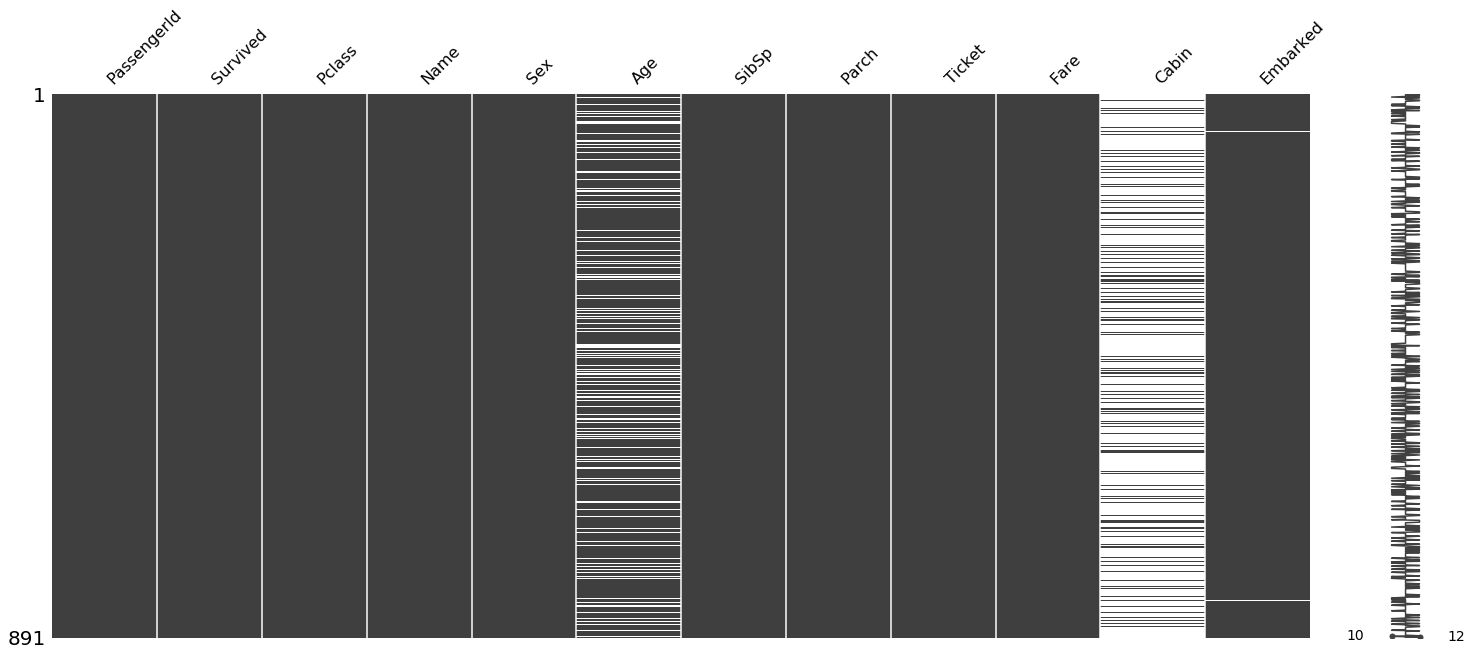

In [12]:
msno.matrix(titanic_df)
#cabin has lot of missing values matrix represent the data completeness 

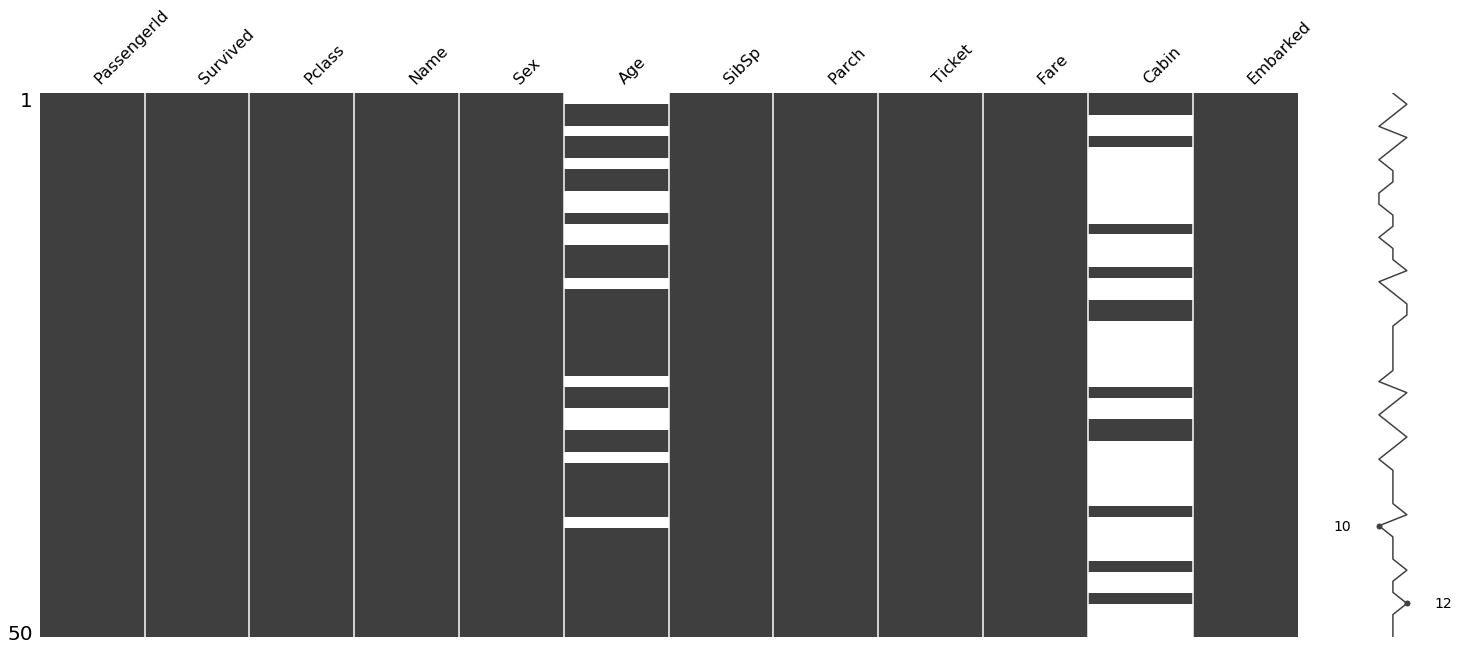

In [13]:
msno.matrix(titanic_df.sample(50))

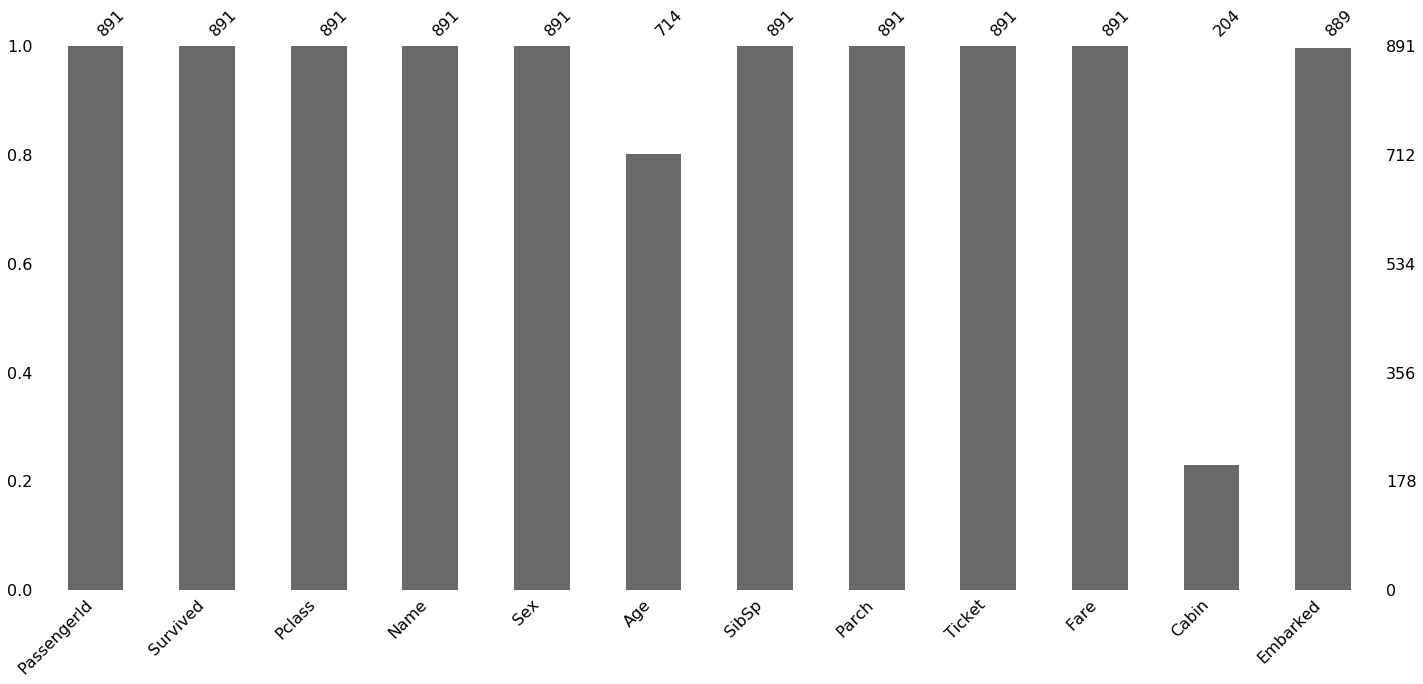

In [17]:
msno.bar(titanic_df)

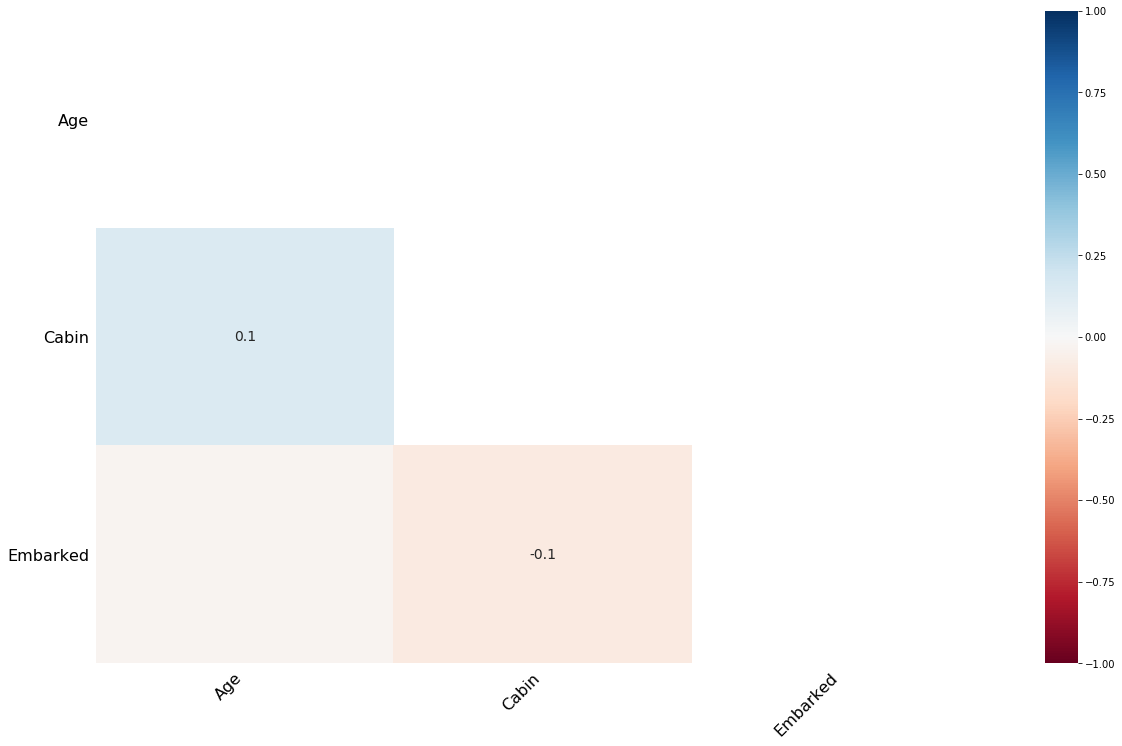

In [20]:
msno.heatmap(titanic_df)